In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df= pd.read_csv(r"C:\Users\Ramdhan\Desktop\DLCVNLP\TensorFlow\Home Work\Salary_Forcast\adult.data",sep=',',
                 names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'])

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#Null Values Check 
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [6]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [7]:
df['salary'] = np.where(df['salary']==' <=50K',0,1)

In [8]:
X=df.drop('salary',axis="columns")
y=df['salary']

In [9]:
#Applying Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X.loc[:,['workclass','education','marital-status','occupation','relationship','race','sex','native-country']]=\
X.loc[:,['workclass','education','marital-status','occupation','relationship','race','sex','native-country']].apply(le.fit_transform)


In [10]:
#X = pd.get_dummies(data=X, columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])

In [11]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [12]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [13]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int32

# Creating NN for Salary Prediction Classification problem

In [14]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=2)

In [15]:
# normalize all the data points and cast the labels to int64
import tensorflow as tf
train_x, test_x = tf.cast(train_x, tf.int64), tf.cast(test_x, tf.int64)
train_y, test_y = tf.cast(train_y,tf.int64),tf.cast(test_y,tf.int64)

In [16]:
salmodel = tf.keras.models.Sequential();
salmodel.add(tf.keras.layers.Flatten())
salmodel.add(tf.keras.layers.Dense(14,input_dim=14, activation='relu'))
salmodel.add(tf.keras.layers.Dense(1,activation='sigmoid'))
salmodel.compile (optimizer= tf.keras.optimizers.Adam(), loss='binary_crossentropy',metrics = ['accuracy'])

In [17]:
salmodel.fit(train_x, train_y, batch_size=8, epochs=50)

Epoch 1/50
2931/2931 [==============================] - 6s 2ms/step - loss: 91.2052 - accuracy: 0.6837
Epoch 2/50
2931/2931 [==============================] - 7s 2ms/step - loss: 64.1579 - accuracy: 0.6851
Epoch 3/50
2931/2931 [==============================] - 6s 2ms/step - loss: 64.1029 - accuracy: 0.6851
Epoch 4/50
2931/2931 [==============================] - 6s 2ms/step - loss: 61.7251 - accuracy: 0.6949
Epoch 5/50
2931/2931 [==============================] - 7s 2ms/step - loss: 52.8522 - accuracy: 0.6993
Epoch 6/50
2931/2931 [==============================] - 7s 3ms/step - loss: 54.7503 - accuracy: 0.6973
Epoch 7/50
2931/2931 [==============================] - 7s 2ms/step - loss: 59.5761 - accuracy: 0.7007
Epoch 8/50
2931/2931 [==============================] - 6s 2ms/step - loss: 47.7375 - accuracy: 0.7011
Epoch 9/50
2931/2931 [==============================] - 6s 2ms/step - loss: 50.1619 - accuracy: 0.7050
Epoch 10/50
2931/2931 [==============================] - 6s 2ms/step - lo

In [18]:
salmodel.evaluate(test_x, test_y)

102/102 [==============================] - 0s 2ms/step - loss: 4.3271 - accuracy: 0.7888


[4.327094554901123, 0.7887626886367798]

In [19]:
predict = salmodel.predict(test_x)

In [20]:
y_pred =[]
for i in range(len(predict)):
    y_pred.append(np.where(predict[i]>0.5,1,0))


In [21]:
results= pd.DataFrame(y_pred,columns=['result'])

In [22]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(test_y,results))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2444
           1       0.57      0.62      0.60       813

    accuracy                           0.79      3257
   macro avg       0.72      0.73      0.73      3257
weighted avg       0.80      0.79      0.79      3257



In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_y, results)
print(cm)

[[2063  381]
 [ 307  506]]


Text(69.0, 0.5, 'Truth')

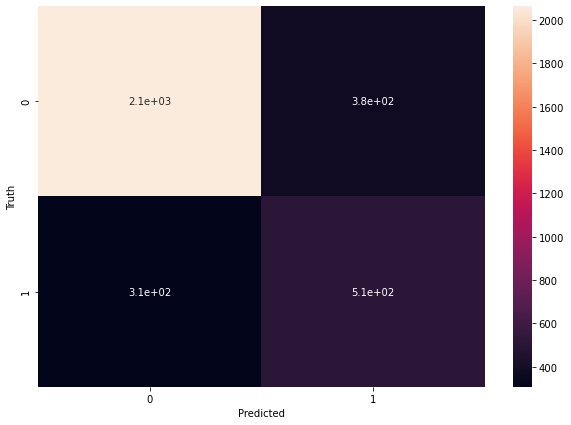

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
salmodel.save("salmodel2.h5")